<a href="https://colab.research.google.com/github/Chenxinnnn/Spotify-popularity-prediction/blob/main/1001_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels
import statsmodels

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# Here is our team member Chenxin Gu's N-number
rng = np.random.default_rng(11508118)
RN = 11508118

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/My Drive/1001_Capstone/spotify52kData.csv")

In [ ]:
df.head()

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.isna().any()

songNumber          False
artists             False
album_name          False
track_name          False
popularity          False
duration            False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
track_genre         False
dtype: bool

In [ ]:
duplicate_rows = df.duplicated().sum()

duplicate_rows

0

## Q1 Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

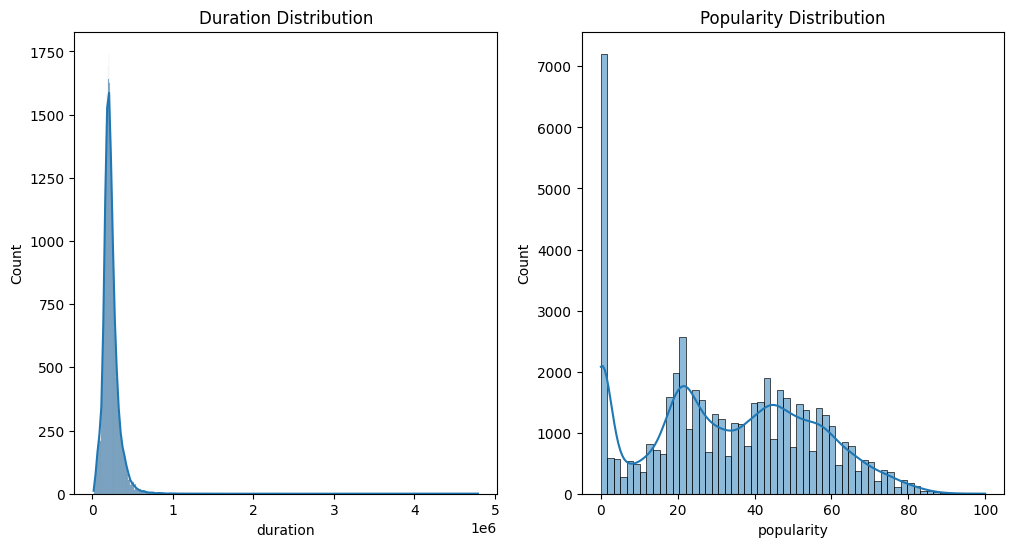

In [ ]:
# distribution of duration and popularity
plt.figure(figsize=(12, 6))

# distribution of duration
plt.subplot(1, 2, 1)
sns.histplot(df['duration'], kde=True)
plt.title('Duration Distribution')

# distribution of popularity
plt.subplot(1, 2, 2)
sns.histplot(df['popularity'], kde=True)
plt.title('Popularity Distribution')

plt.show()

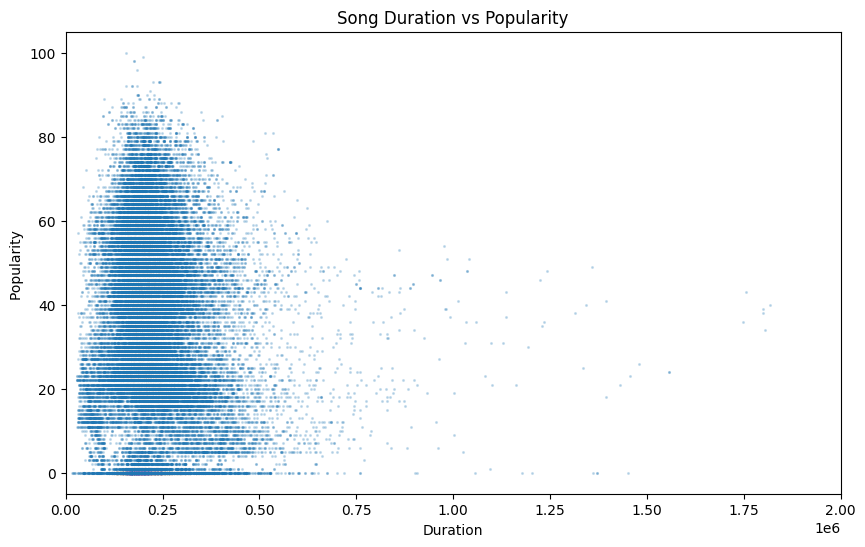

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['popularity'], alpha=0.2, s=1.5)

# Add titles and labels
plt.title('Song Duration vs Popularity')
plt.xlabel('Duration')
plt.ylabel('Popularity ')
plt.xlim([0,2e6])

# Show the plot
plt.show()

In [ ]:
# Calculate Pearson Correlation Coefficient
correlation, p_value = stats.pearsonr(df['duration'], df['popularity'])

print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson Correlation Coefficient: -0.054651195936376365
P-value: 1.0691602830483818e-35


In [ ]:
quantile_10 = df['duration'].quantile(0.10)
quantile_80 = df['duration'].quantile(0.80)

# filter data between this level
filtered_df = df[(df['duration'] >= quantile_10) & (df['duration'] <= quantile_80)]

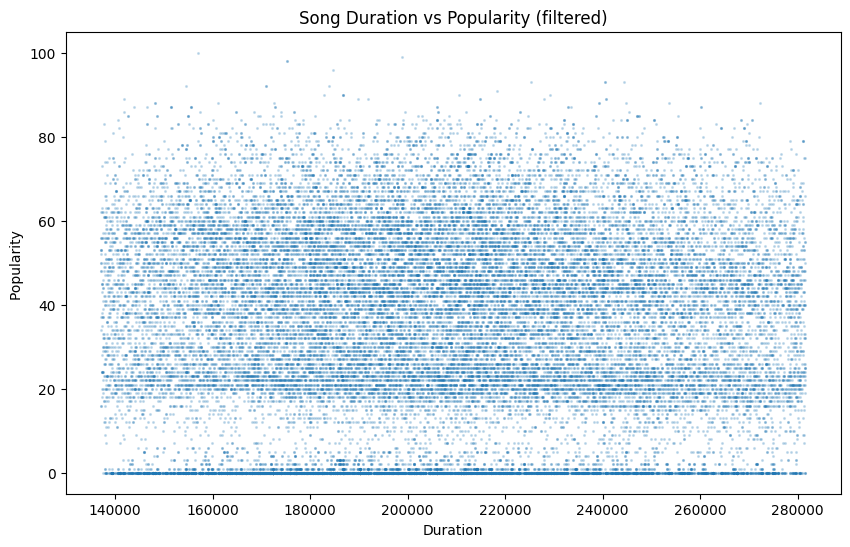

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['duration'], filtered_df['popularity'], alpha=0.2, s=1.5)

# Add titles and labels
plt.title('Song Duration vs Popularity (filtered)')
plt.xlabel('Duration')
plt.ylabel('Popularity ')


# Show the plot
plt.show()

In [ ]:
# Calculate Pearson Correlation Coefficient
correlation, p_value = stats.pearsonr(filtered_df['duration'], filtered_df['popularity'])

print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson Correlation Coefficient: 0.01139246653047948
P-value: 0.02973970087643911


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = df[['duration']]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RN)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE is:", mse)
print("R² is:", r2)

MSE is: 476.4308000230075
R² is: 0.004372522990672589


In [ ]:
X = filtered_df[['duration']]
y = filtered_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RN)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE is:", mse)
print("R² is:", r2)

MSE is: 504.40354720193636
R² is: -0.0003519200277253276


## Q2 Are explicitly rated songs more popular than songs that are not explicit?

In [ ]:
explicit = df[(df['explicit'] == True)]
implicit = df[(df['explicit'] == False)]
len(explicit), len(implicit)

(5597, 46403)

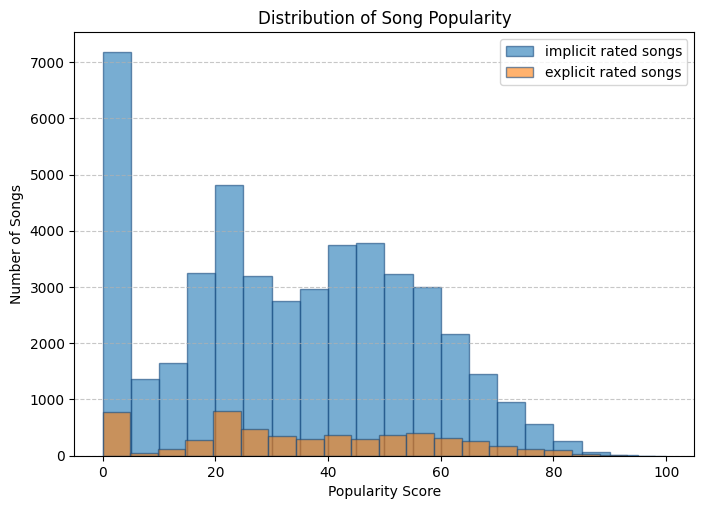

In [ ]:
# Plotting the distribution of song popularity for the entire dataset and for the 2010s on the same graph
plt.figure(figsize=(8, 5.5))

# Plot for the entire dataset
plt.hist(implicit['popularity'], bins=20, alpha=0.6, edgecolor='#174a7e', label='implicit rated songs')
plt.hist(explicit['popularity'], bins=20, alpha=0.6, edgecolor='#174a7e', label='explicit rated songs')

plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Songs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
explicit_popularity = explicit['popularity']
implicit_popularity = implicit['popularity']
observed_diff = explicit_popularity.mean() - implicit_popularity.mean()

# Bootstrap resampling
num_experiments = int(1e4)
bootstrapped_diffs = []

for i in range(num_experiments):
    bootstrapped_explicit = rng.choice(explicit_popularity, size=len(explicit_popularity), replace=True)
    bootstrapped_implicit = rng.choice(implicit_popularity, size=len(implicit_popularity), replace=True)
    bootstrapped_diffs.append(bootstrapped_explicit.mean() - bootstrapped_implicit.mean())

# Two-tailed p-value
p_value = np.sum(np.abs(bootstrapped_diffs) >= np.abs(observed_diff)) / num_experiments

# Display results
print(f"Observed difference in means: {observed_diff:.4f}")
print(f"P-value for observed difference: {p_value:.4f}")

# Interpret the results
if p_value < 0.005:
    print("The observed difference is statistically significant at the 0.005 level.")
else:
    print("The observed difference is not statistically significant at the 0.005 level.")


Observed difference in means: 3.0225
P-value for observed difference: 0.5037
The observed difference is not statistically significant at the 0.005 level.


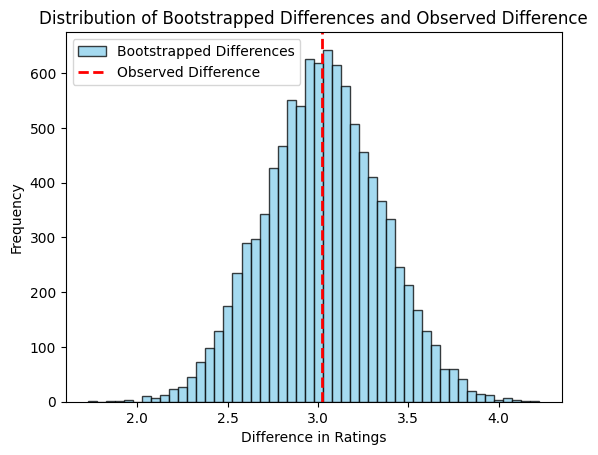

In [ ]:
# Plot the distribution of bootstrapped differences
plt.hist(bootstrapped_diffs, bins=50, alpha=0.75, label='Bootstrapped Differences', color='skyblue', edgecolor='black')

# Plot the observed difference
plt.axvline(x=observed_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')

# Add labels, legend, and title
plt.title('Distribution of Bootstrapped Differences and Observed Difference')
plt.xlabel('Difference in Ratings')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

## Q3 Are songs in major key more popular than songs in minor key?

In [ ]:
major = df[(df['mode'] == 1)]
minor = df[(df['mode'] == 0)]
len(major), len(minor)

(32391, 19609)

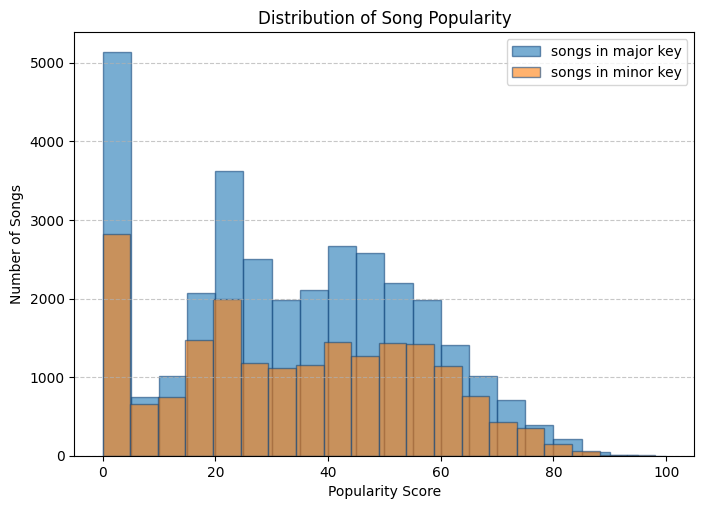

In [ ]:
# Plotting the distribution of song popularity for the entire dataset and for the 2010s on the same graph
plt.figure(figsize=(8, 5.5))

# Plot for the entire dataset
plt.hist(major['popularity'], bins=20, alpha=0.6, edgecolor='#174a7e', label='songs in major key')
plt.hist(minor['popularity'], bins=20, alpha=0.6, edgecolor='#174a7e', label='songs in minor key')

plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Songs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Sample size vary too much, so we conduct bootstrap resampling test.

In [ ]:
major_popularity = major['popularity']
minor_popularity = minor['popularity']
observed_diff = major_popularity.mean() - minor_popularity.mean()

# Bootstrap resampling
num_experiments = int(1e4)
bootstrapped_diffs = []

for i in range(num_experiments):
    bootstrapped_explicit = rng.choice(major_popularity, size=len(major_popularity), replace=True)
    bootstrapped_implicit = rng.choice(minor_popularity, size=len(minor_popularity), replace=True)
    bootstrapped_diffs.append(bootstrapped_explicit.mean() - bootstrapped_implicit.mean())

# Two-tailed p-value
p_value = np.sum(np.abs(bootstrapped_diffs) >= np.abs(observed_diff)) / num_experiments

# Display results
print(f"Observed difference in means: {observed_diff:.4f}")
print(f"P-value for observed difference: {p_value:.4f}")

# Interpret the results
if p_value < 0.005:
    print("The observed difference is statistically significant at the 0.005 level.")
else:
    print("The observed difference is not statistically significant at the 0.005 level.")


Observed difference in means: -0.9481
P-value for observed difference: 0.4985
The observed difference is not statistically significant at the 0.005 level.


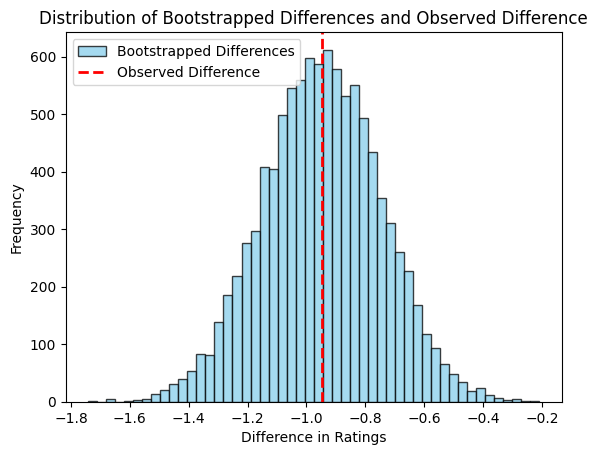

In [ ]:
# Plot the distribution of bootstrapped differences
plt.hist(bootstrapped_diffs, bins=50, alpha=0.75, label='Bootstrapped Differences', color='skyblue', edgecolor='black')

# Plot the observed difference
plt.axvline(x=observed_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')

# Add labels, legend, and title
plt.title('Distribution of Bootstrapped Differences and Observed Difference')
plt.xlabel('Difference in Ratings')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

## Q4 Which of the following 10 song features: duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo predicts popularity best? **instrumentalness** How good is this model? **Not good at all**

In [ ]:
selected_features = ['duration', 'danceability', 'energy', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'popularity']
song_features_10 = df[selected_features].copy()
song_features_10.head()

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,73
1,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,55
2,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,57
3,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,71
4,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,82


Here we eliminate Outliers.

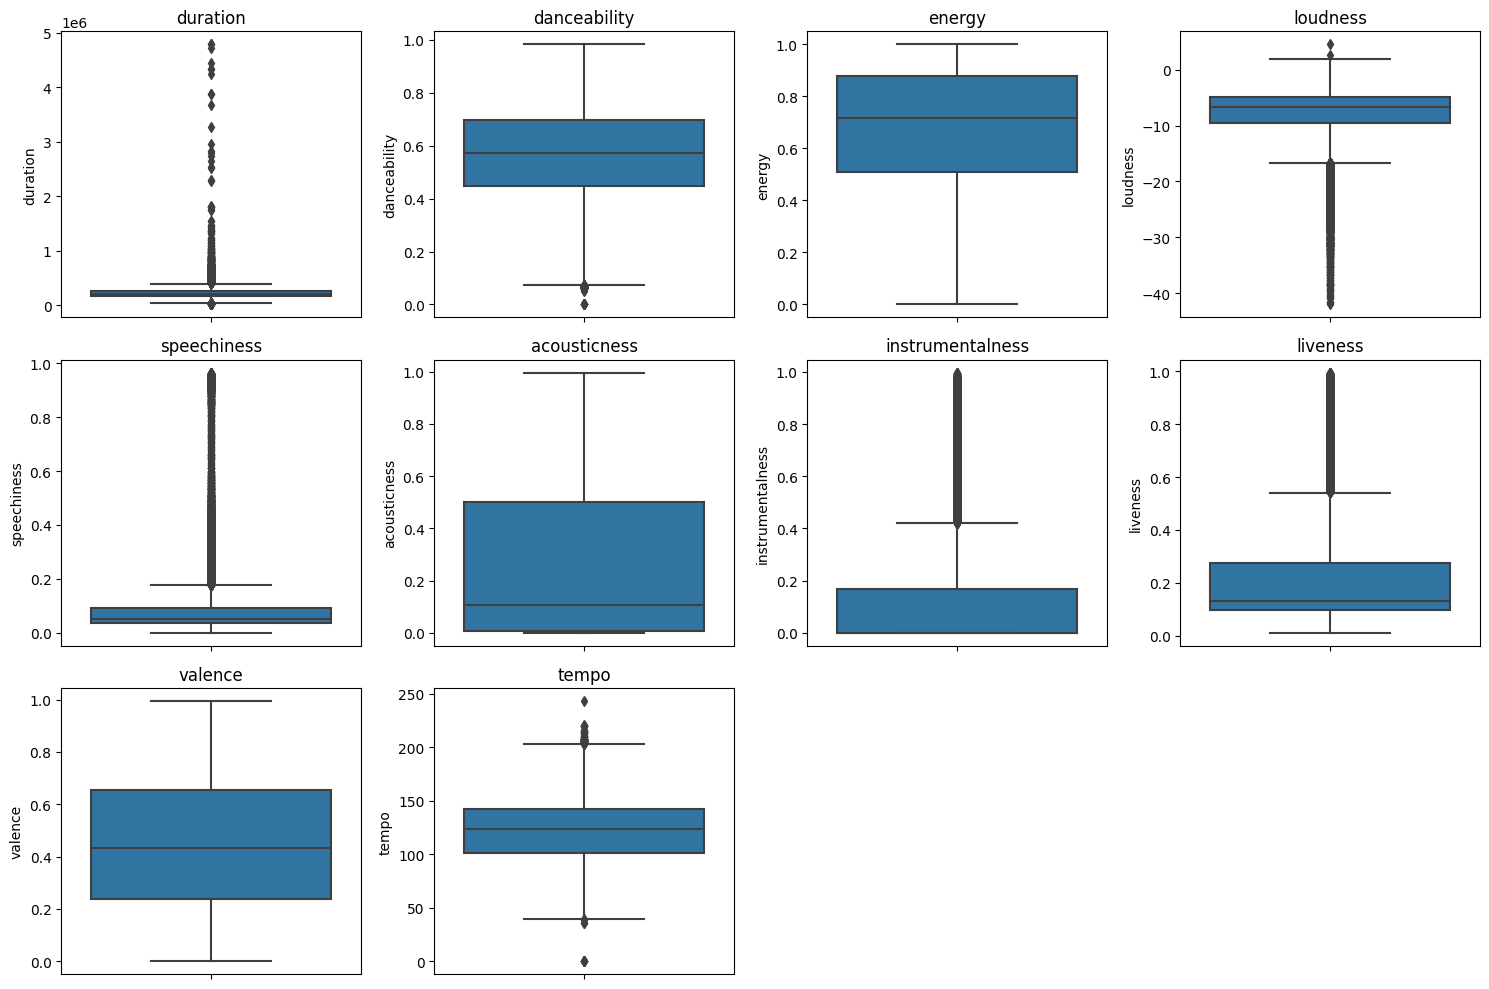

In [ ]:
import seaborn as sns

# Plotting boxplots for each of the ten features to visualize outliers
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features[:-1]):  # Exclude 'popularity' from the outlier check
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=song_features_10[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

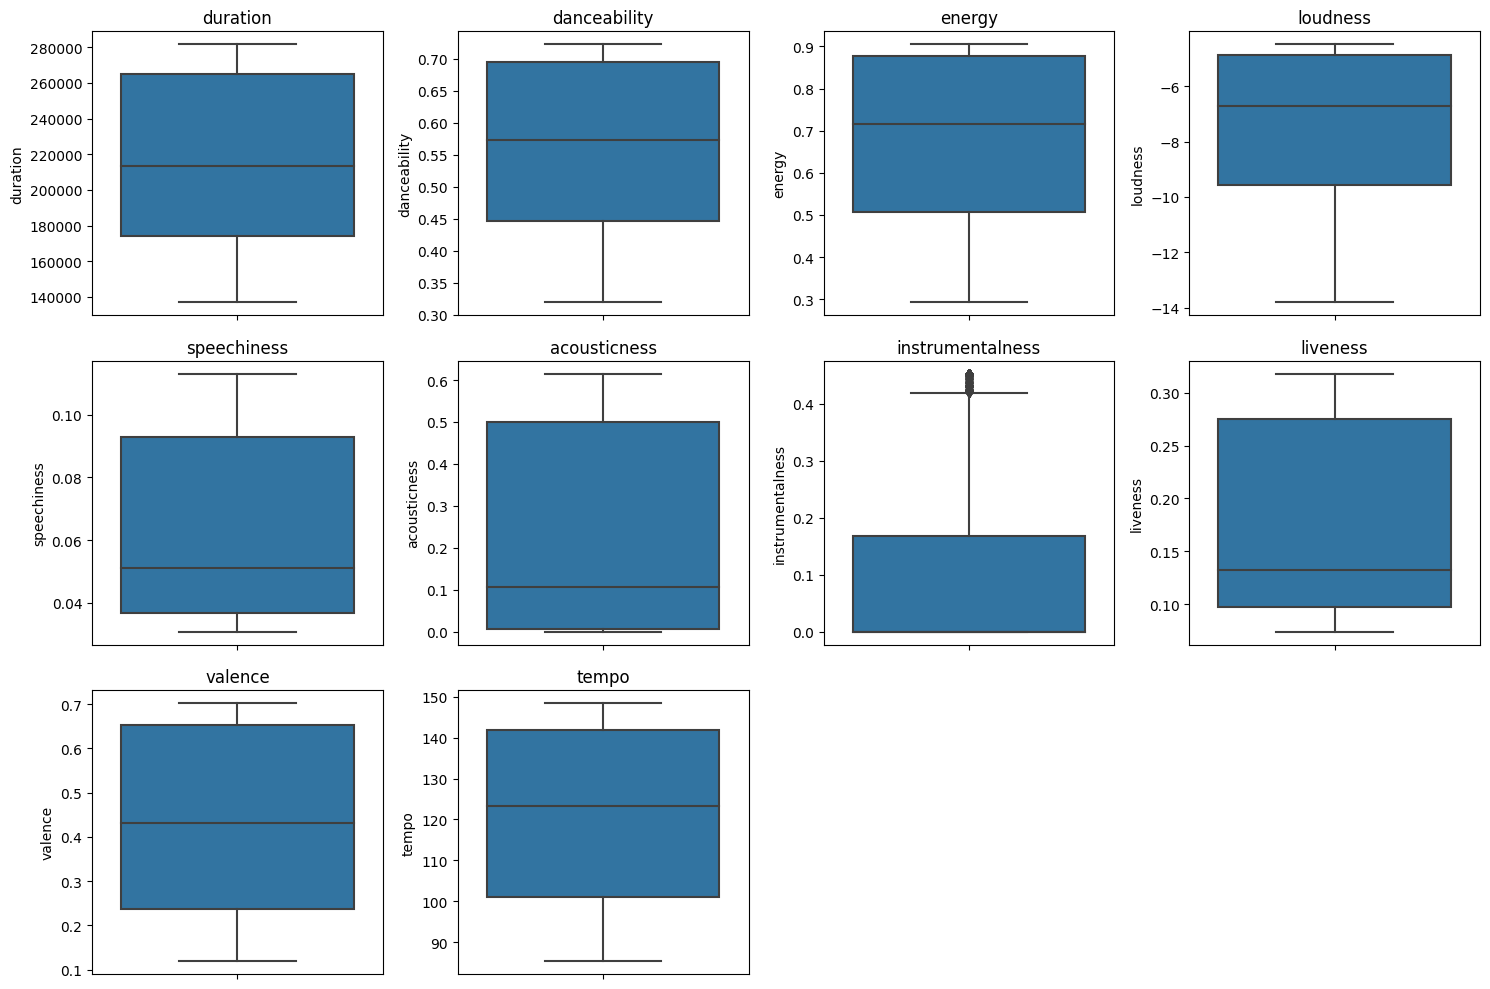

In [ ]:
# Adjusting the capping to use the 10th and 80th percentiles

for feature in selected_features[:-1]:  # Exclude 'popularity' for capping
    lower_bound = song_features_10[feature].quantile(0.1)
    upper_bound = song_features_10[feature].quantile(0.8)
    song_features_10[feature] = song_features_10[feature].clip(lower_bound, upper_bound)

# Displaying the boxplots again after adjusting the capping
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features[:-1]):  # Exclude 'popularity' from the outlier check
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=song_features_10[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

Instrumentalness is still right-skewed, so we use log transformation to normalize it.

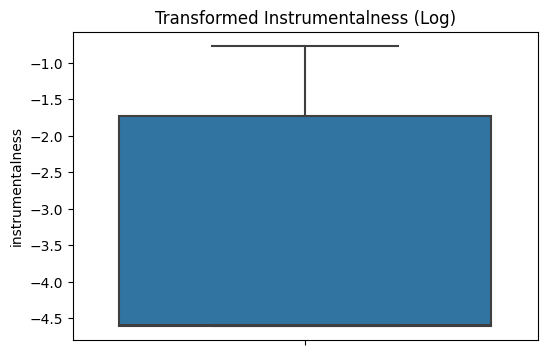

In [ ]:
# Applying a log transformation to 'instrumentalness'
# Adding a small constant to avoid log(0)
small_constant = 0.01
song_features_10['instrumentalness'] = np.log(song_features_10['instrumentalness'] + small_constant)

# Plotting the transformed 'instrumentalness'
plt.figure(figsize=(6, 4))
sns.boxplot(y=song_features_10['instrumentalness'])
plt.title('Transformed Instrumentalness (Log)')
plt.show()

Now let's see the multicollinearity between these 10 features.

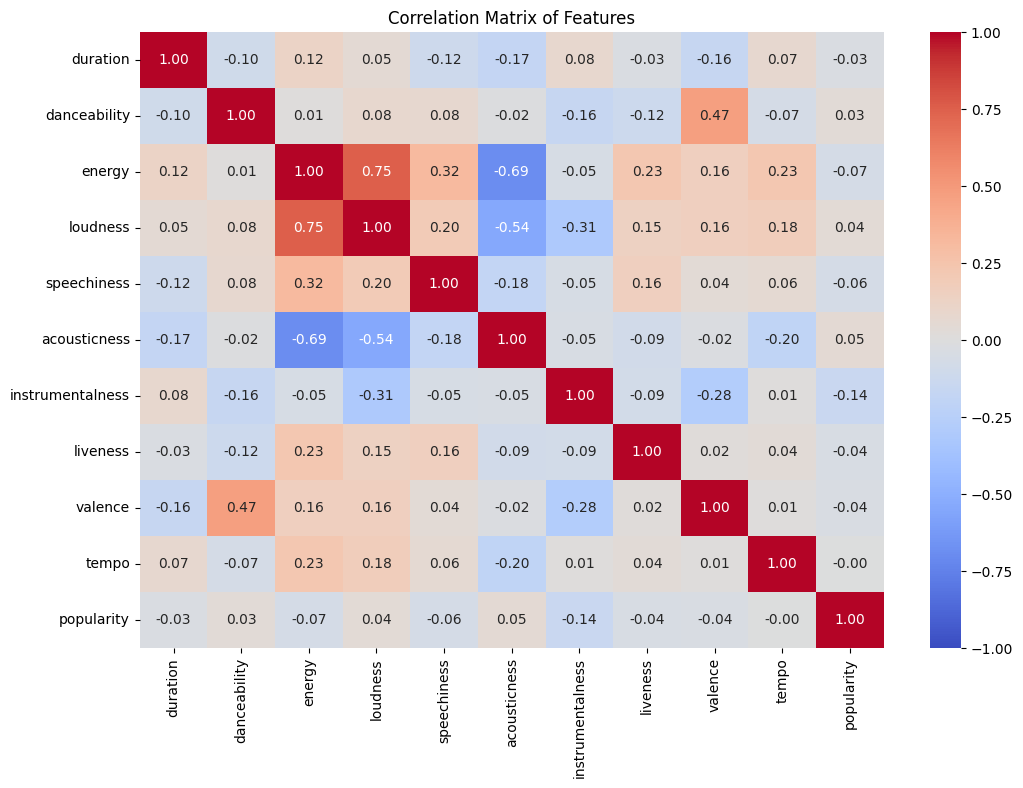

In [ ]:
import seaborn as sns

# Correlation matrix
corr_matrix = song_features_10.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()


it appears that most features have low to moderate correlations with each other, suggesting that multicollinearity might not be a significant issue

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def build_func(song_features_10):
    best_predictor = None
    cod_scores = []
    best_cod = -np.inf

    for j in range(10):

        X = song_features_10.iloc[:, j].values.reshape(-1, 1)
        y = song_features_10.iloc[:, -1].values

        # Building the model
        model = LinearRegression().fit(X, y)
        predictions = model.predict(X)
        cod = r2_score(y, predictions)

        # Storing the COD value
        cod_scores.append(cod)

        # Checking if this feature is the best predictor
        if cod > best_cod:
            best_cod = cod
            best_predictor = j

    return best_predictor, cod_scores, best_cod

# Usage of the function
best_predictor, cod_scores, best_cod = build_func(song_features_10)
best_predictor_name = song_features_10.columns[best_predictor]

print(f"Best predictor: {best_predictor_name} with COD: {best_cod}")
print("COD scores for each feature:", cod_scores)

Best predictor: instrumentalness with COD: 0.020614864581744774
COD scores for each feature: [0.0007971780956345098, 0.0011659738220833882, 0.00437692272738488, 0.0018338449733930062, 0.004083609781038056, 0.002539297817278796, 0.020614864581744774, 0.00190907001273255, 0.0012584432407434232, 1.325820624209495e-05]


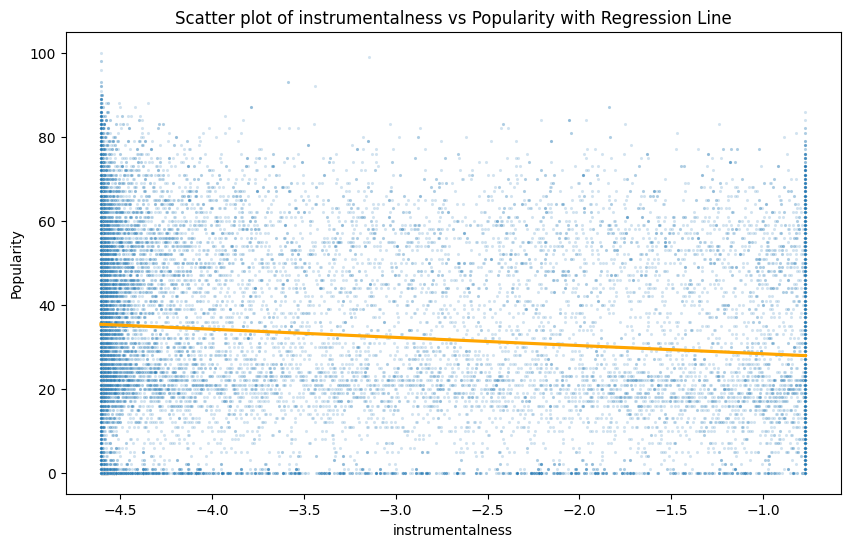

In [ ]:
X = song_features_10[best_predictor_name]
y = song_features_10['popularity']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, alpha=0.2, s= 5)
sns.regplot(x=X, y=y, scatter=False, color='orange')

# Adding titles and labels
plt.title(f'Scatter plot of {best_predictor_name} vs Popularity with Regression Line')
plt.xlabel(best_predictor_name)
plt.ylabel('Popularity')

# Show the plot
plt.show()

## Q5 Building a model that uses *all* of the song features mentioned in question 4, how well can you predict popularity? How much (if at all) is this model improved compared to the model in question 4). How do you account for this? What happens if you regularize your model?

In [ ]:
from sklearn.preprocessing import StandardScaler

X = song_features_10.iloc[:,:-1]
X_scaled = StandardScaler().fit_transform(X)

song_features_10[selected_features[:-1]] = X_scaled

# Displaying the updated dataframe
song_features_10.head()


,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,0.312789,0.854250,-1.000596,0.287661,1.604353,-0.796938,-0.712056,1.563042,1.291682,-1.501615,73
1,-1.317019,-0.991872,-1.797303,-1.977056,0.414930,1.568322,-0.711772,-0.787396,-0.784136,-1.619940,55
2,-0.086137,-0.862067,-1.484311,-0.670658,-0.252703,-0.075347,-0.712119,-0.614092,-1.485620,-1.619940,57
3,-0.264951,-1.713014,-1.797303,-1.977056,-0.881445,1.568322,-0.707730,-0.451619,-1.375864,1.265695,71
4,-0.326881,0.435988,-1.085957,-0.653660,-0.353172,0.975790,-0.712119,-0.983446,-1.261336,-0.036412,82


In [ ]:
def build_multi_regression_model(song_features_10):

    # Splitting the dataset
    X = song_features_10.iloc[:, :-1].values
    y = song_features_10['popularity'].values

    # Building the model
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    cod = r2_score(y, predictions)

    return cod

# Usage of the function
cod = build_multi_regression_model(song_features_10)
print(f"COD value for the multi-dimensional regression model: {cod}")

COD value for the multi-dimensional regression model: 0.04367224407626691


Since we don't want to perform feature selection at this point, we choose to use ridge regression as regularization.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


def my_ridge_reg(song_features_10):

    # Splitting the dataset
    X = song_features_10.iloc[:, :-1]
    y = song_features_10['popularity']

    # Split the data into training and testing sets with a specific random seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RN)

    # Building the Ridge regression model
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)

    # Making predictions and evaluating the model
    predictions = ridge_model.predict(X_test)
    r2 = r2_score(y_test, predictions)

    return predictions, r2

predictions, r2 = my_ridge_reg(song_features_10)

print(f'Ridge Regression R2 Score: {r2}')


Ridge Regression R2 Score: 0.0473221596264225


## Q6 When considering the 10 song features in the previous question, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for? Using these principal components, how many clusters can you identify? **Do these clusters reasonably correspond to the genre labels in column 20 of the data?**

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA()
pca.fit(X_scaled)# from Question 5, standardize 10 features

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

explained_variance, cumulative_variance

(array([0.26607784, 0.17105835, 0.11540097, 0.09846981, 0.09101003,
        0.08059288, 0.07471805, 0.04884398, 0.03718419, 0.0166439 ]),
 array([0.26607784, 0.43713619, 0.55253716, 0.65100697, 0.742017  ,
        0.82260988, 0.89732793, 0.94617191, 0.9833561 , 1.        ]))

From the examplained_variance, we see that


---


1. The first principal component explains approximately 26.6% of the variance.

2. The second principal component explains about 17.1% of the  variance.

3. The third component accounts for roughly 11.5% of the variance.


---
Cumulatively, the variance explained by the principal components is as follows:

The first three components together explain about 55.25% of the total variance.
The first four components explain approximately 65.1% of the variance.
To capture more than 75% of the variance, you would need to consider the first six components.
For over 90% of the variance explanation, at least the first seven components should be included.

In [ ]:
# Calculate the proportion of variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Determine the number of components with an eigenvalue greater than 1
eigenvalues = pca.explained_variance_
components = sum(eigenvalues > 1)

# Sum of explained variance of these components
sum_of_explained_variance = sum(explained_variance[eigenvalues > 1])

components, sum_of_explained_variance, explained_variance

(3,
 0.5525371598132629,
 array([0.26607784, 0.17105835, 0.11540097, 0.09846981, 0.09101003,
        0.08059288, 0.07471805, 0.04884398, 0.03718419, 0.0166439 ]))

Based on the Principal Component Analysis (PCA) of the 10 song features (duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo), we can extract 3 meaningful principal components with eigenvalues greater than 1. These three principal components together account for approximately 57.36% of the total variance in the data.

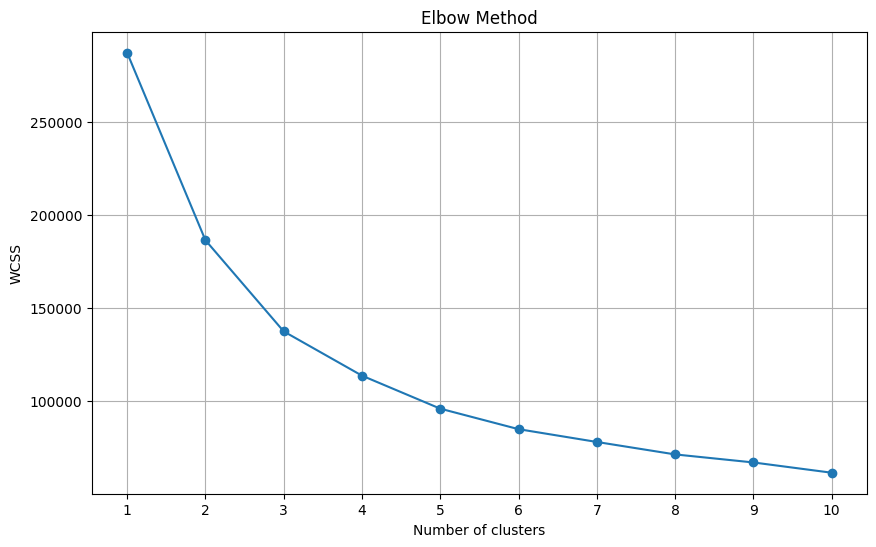

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying PCA transformation with an eigenvalue greater than 1
pca = PCA(n_components=components)
pca_transformed = pca.fit_transform(X_scaled)

# Range of clusters to try
cluster_range = range(1, 11)

# Applying K-means and calculating WCSS for each number of clusters
wcss = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init = 'auto', random_state=RN)
    kmeans.fit(pca_transformed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

From the elbow, we can use eyeball to see the optimal number of clusters should be 4, now we use Silhouette Score to verify it.

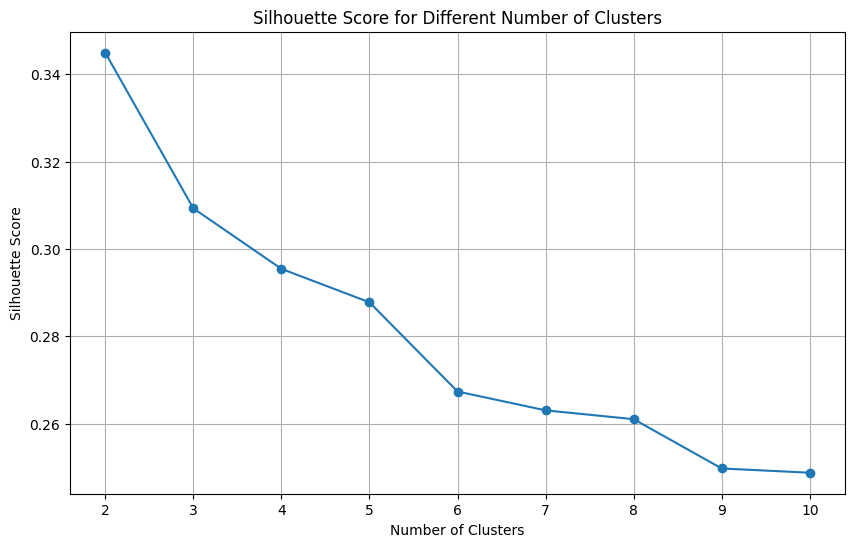

(2, 0.34495191209932285)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_range = range(2, 11)  # Silhouette score is not defined for 1 cluster

# Calculating Silhouette Score for each number of clusters on the smaller subset
silhouette_scores = []
for n_clusters in silhouette_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init = 'auto', random_state= RN)
    cluster_labels = kmeans.fit_predict(pca_transformed)
    silhouette_avg = silhouette_score(pca_transformed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(silhouette_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(silhouette_range)
plt.grid(True)
plt.show()

# The best number of clusters is the one with the highest Silhouette Score
best_num_clusters = silhouette_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

best_num_clusters, best_silhouette_score


Therefore, we say 2 clusters we can identify in this dataset using Silhouette Method. Now we visualize a 3D graph to see it's performance.

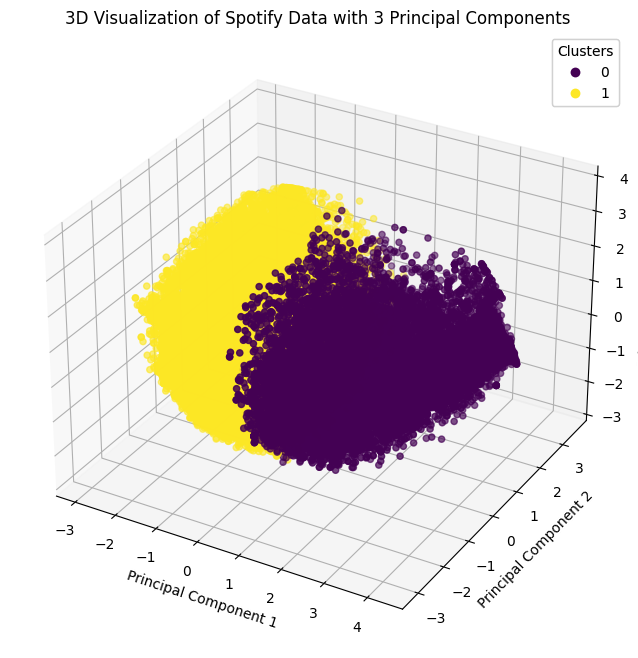

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

num_clusters = best_num_clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init='auto', random_state=RN)
kmeans.fit(pca_transformed)

# Getting the cluster labels
cluster_labels = kmeans.labels_

# and 'clusters' contains the cluster labels from K-means
pc1 = pca_transformed[:, 0]
pc2 = pca_transformed[:, 1]
pc3 = pca_transformed[:, 2]

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc1, pc2, pc3, c=cluster_labels, cmap='viridis', marker='o')
ax.set_title('3D Visualization of Spotify Data with 3 Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


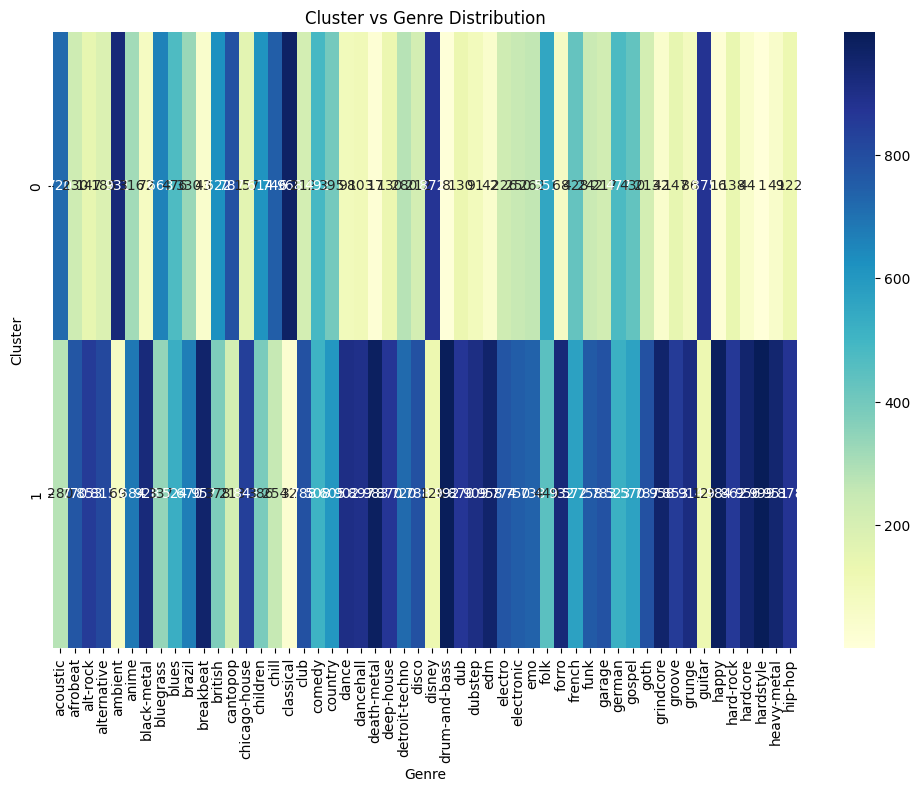

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


num_clusters = best_num_clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init='auto', random_state=RN)
clusters = kmeans.fit_predict(pca_transformed)

# Assign clusters back to your dataframe
df['Cluster'] = clusters

# Create a cross-tabulation
cluster_genre_ct = pd.crosstab(df['Cluster'], df['track_genre'])

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_genre_ct, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Cluster vs Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Cluster")
plt.show()


The graph shows that deep blue and shallow yellow means better clusters in terms of the genre.

## Q7 Can you predict whether a song is in major or minor key from valence using logistic regression or a support vector machine? If so, how good is this prediction? If not, is there a better one?

In [ ]:
valence = df['valence'].describe()
valence

count    52000.000000
mean         0.451814
std          0.255314
min          0.000000
25%          0.238000
50%          0.431000
75%          0.653000
max          0.995000
Name: valence, dtype: float64

<ipython-input-186-5861ca006f97>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['mode'] == 1]['valence'], label='Major Key', shade=True)
<ipython-input-186-5861ca006f97>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['mode'] == 0]['valence'], label='Minor Key', shade=True)


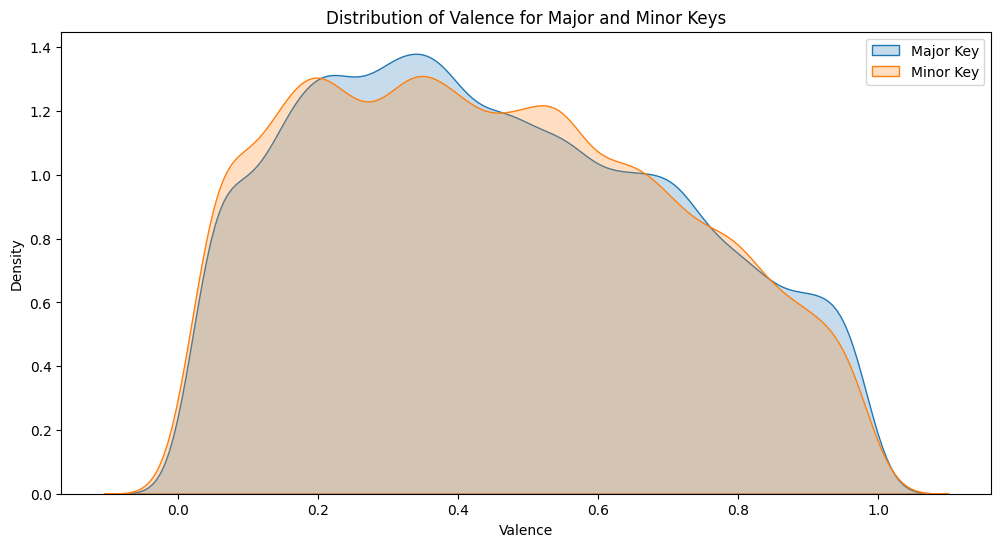

(None,
 1    32391
 0    19609
 Name: mode, dtype: int64)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for imbalance in the dataset
mode_counts = df['mode'].value_counts()

# Visualizing the distribution of valence for major and minor keys
plt.figure(figsize=(12, 6))

# Distribution plot
sns.kdeplot(df[df['mode'] == 1]['valence'], label='Major Key', shade=True)
sns.kdeplot(df[df['mode'] == 0]['valence'], label='Minor Key', shade=True)

plt.title('Distribution of Valence for Major and Minor Keys')
plt.xlabel('Valence')
plt.ylabel('Density')
plt.legend()

# Showing the plot and mode counts
plt.show(), mode_counts

In [ ]:
# Checking the balance of the 'mode' feature
mode_balance = df['mode'].value_counts()

# Preprocessing: Selecting only the 'valence' and 'mode' columns for our analysis
data_subset = df[['valence', 'mode']]

# Display mode balance and the first few rows of the subset
mode_balance, data_subset.head()


(1    32391
 0    19609
 Name: mode, dtype: int64,
    valence  mode
 0    0.715     0
 1    0.267     1
 2    0.120     1
 3    0.143     1
 4    0.167     1)

For simplicity, we'll start by using a straightforward approach of Undersampling method.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Defining features (X) and target (y)
X = df[['valence']]
y = df['mode']

# # Addressing the imbalance using SMOTE
# smote = SMOTE(random_state=RN)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RN)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a logistic regression model
logistic_model = LogisticRegression(random_state=RN)
logistic_model.fit(X_train_scaled, y_train)

# Training a support vector machine model
svm_model = SVC(random_state=RN)
svm_model.fit(X_train_scaled, y_train)

# Making predictions with both models on the test set
logistic_predictions = logistic_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluating the performance of the logistic regression model
logistic_f1 = f1_score(y_test, logistic_predictions)

# Evaluating the performance of the SVM model
svm_f1 = f1_score(y_test, svm_predictions)


logistic_f1, svm_f1


SVM is better than logistic regression in this case. After we deal with imbalanced data, we train the model in terms of SVM and logistic regression to find the best prediction. And if we set 50% as the benchmark, we say SVM is better than Logistic regression. Although both of them don't perform well enough.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

decision_tree = f1_score(y_test, y_pred)
decision_tree

Decision tree is better than the other two algorithms.

## Q8 Can you predict genre by using the 10 song features from question 4 directly or the principal components you extracted in question 6 with a neural network? How well does this work?

In [ ]:
song_features_10 = song_features_10.drop(columns=['popularity'])
song_features_10['genre'] = df['track_genre'].copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize
features = song_features_10.drop(columns=['genre'])
scaler = MinMaxScaler()
song_features_10[features.columns] = scaler.fit_transform(features)
song_features_10.head()

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.044684,0.687691,0.460989,0.757858,0.148187,0.032329,0.000001,0.352511,0.718593,0.361245,acoustic
1,0.027697,0.427263,0.165983,0.532656,0.079067,0.927711,0.000006,0.091279,0.268342,0.318397,acoustic
2,0.040526,0.445575,0.358987,0.693705,0.057720,0.210843,0.000000,0.107542,0.120603,0.313643,acoustic
3,0.038662,0.270600,0.059581,0.505174,0.037617,0.908635,0.000071,0.122789,0.143719,0.746758,acoustic
4,0.038017,0.628688,0.442989,0.694843,0.054508,0.470884,0.000000,0.072881,0.167839,0.492863,acoustic


In [ ]:
song_features_10['genre'].nunique()

52

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout

X = song_features_10.drop(columns=['genre']).values
y = song_features_10['genre'].values

# encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Train Test spilt
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=11508118)

# Reshape for 1D CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape

(41600, 10, 1)

In [ ]:
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])

optimizer_adam = Adam(lr=0.005)

model.compile(optimizer=optimizer_adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 32)             160       
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense (Dense)               (None, 64)                6208      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                        

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh'), input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Bidirectional(LSTM(64, activation='tanh')),
    Dropout(0.2),
    Dense(y_categorical.shape[1], activation='softmax')
])

optimizer_adam = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)


Epoch 1/20
1040/1040 [==============================] - 83s 71ms/step - loss: 3.2547 - accuracy: 0.1502 - val_loss: 2.9130 - val_accuracy: 0.2089
Epoch 2/20
1040/1040 [==============================] - 69s 67ms/step - loss: 2.8834 - accuracy: 0.2144 - val_loss: 2.7889 - val_accuracy: 0.2343
Epoch 3/20
1040/1040 [==============================] - 68s 66ms/step - loss: 2.7904 - accuracy: 0.2362 - val_loss: 2.7605 - val_accuracy: 0.2392
Epoch 4/20
1040/1040 [==============================] - 67s 64ms/step - loss: 2.7370 - accuracy: 0.2468 - val_loss: 2.7051 - val_accuracy: 0.2530
Epoch 5/20
1040/1040 [==============================] - 70s 68ms/step - loss: 2.6911 - accuracy: 0.2563 - val_loss: 2.6676 - val_accuracy: 0.2615
Epoch 6/20
1040/1040 [==============================] - 66s 63ms/step - loss: 2.6544 - accuracy: 0.2660 - val_loss: 2.6723 - val_accuracy: 0.2589
Epoch 7/20
1040/1040 [==============================] - 68s 65ms/step - loss: 2.6178 - accuracy: 0.2738 - val_loss: 2.6575 -

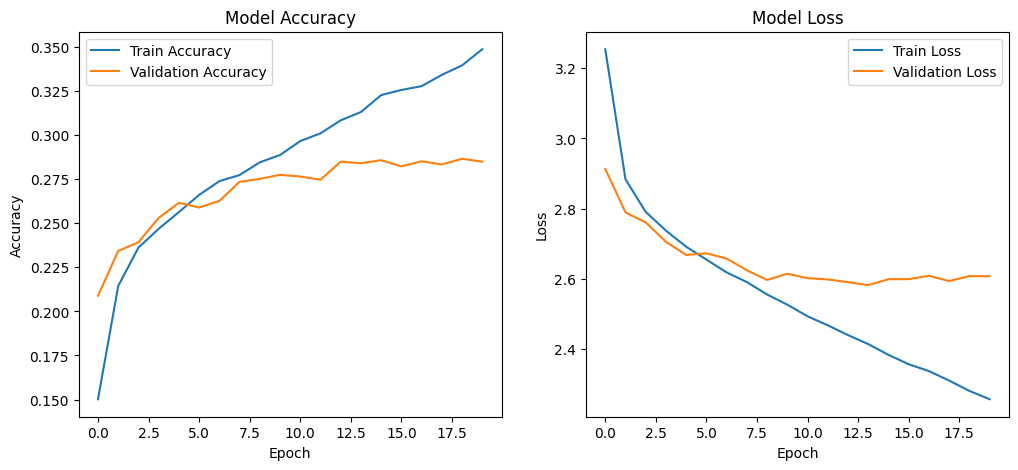

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
# Testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


325/325 [==============================] - 9s 29ms/step - loss: 2.6073 - accuracy: 0.2943
Test Accuracy: 0.29432693123817444


## Q9 In recommender systems, the popularity based model is an important baseline. We have a two part question in this regard: a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for? b) Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?

In [ ]:
star_rating = pd.read_csv("/content/drive/My Drive/1001_Capstone/starRatings.csv", header=None)

In [ ]:
star_rating.shape

(10000, 5000)

In [ ]:
star_rating.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Counting the number of ratings (non-NaN values) for each song
ratings_count = star_rating.count()

# Filter to keep only songs with at least 5 ratings
songs = ratings_count[ratings_count >= 5].index

# Filter the average_star_ratings and the Spotify data accordingly
avg_star_ratings = star_rating.mean(axis=0, skipna=True)
avg_star_ratings = avg_star_ratings[songs]
df_filtered = df.loc[df['songNumber'].isin(songs)]

# Updating the analysis_data DataFrame to include only songs with at least 5 ratings
analysis_data = df_filtered[['songNumber', 'popularity']].copy()
analysis_data['average_star_rating'] = avg_star_ratings.values

# Display the first few rows of the updated DataFrame
analysis_data_head = analysis_data.head()
analysis_data_head, analysis_data.shape

(   songNumber  popularity  average_star_rating
 0           0          73             3.196939
 1           1          55             1.361029
 2           2          57             2.186377
 3           3          71             1.576998
 4           4          82             3.038835,
 (5000, 3))

In [ ]:
# Perform a correlation analysis between popularity and average star rating
correlation_result = analysis_data['popularity'].corr(analysis_data['average_star_rating'])

correlation_result

0.5693914205195065

The correlation between a song's popularity and its average star rating is approximately 0.57. This indicates a moderate positive relationship. In other words, there tends to be a tendency for songs with higher popularity scores to also have higher average star ratings, although this relationship is not extremely strong.

In [ ]:
# Finding the top 10 songs based on the popularity score
top_10_songs_popularity = df[['songNumber', 'artists', 'track_name', 'popularity']].head(5000).nlargest(10, 'popularity')

top_10_songs_popularity

,songNumber,artists,track_name,popularity
2003,2003,The Neighbourhood,Sweater Weather,93
3003,3003,The Neighbourhood,Sweater Weather,93
2000,2000,The Neighbourhood,Daddy Issues,87
3000,3000,The Neighbourhood,Daddy Issues,87
3300,3300,Oliver Tree;Robin Schulz,Miss You,87
2002,2002,The Neighbourhood,Softcore,86
2106,2106,The Killers,Mr. Brightside,86
3002,3002,The Neighbourhood,Softcore,86
3004,3004,GAYLE,abcdefu,86
3257,3257,The Killers,Mr. Brightside,86


In [ ]:
def calculate_ap(user_ratings, top_10_recommendations):
    # Identifying the top-rated songs by the user
    user_top_songs = user_ratings.sort_values(ascending=False).head(10).index

    # Calculating precision at each rank
    hits = 0
    total_precision = 0
    for i, song in enumerate(top_10_recommendations, start=1):
        if song in user_top_songs:
            hits += 1
            total_precision += hits / i

    # Average precision
    if hits > 0:
        return total_precision / min(len(user_top_songs), 10)
    else:
        return 0

# List of top 10 songs from the popularity model
top_10_songs_indices = top_10_songs_popularity['songNumber'].tolist()

# Calculate AP for each user
aps = [calculate_ap(star_rating.iloc[user], top_10_songs_indices) for user in range(len(star_rating))]

# Calculate MAP
map_score = sum(aps) / len(aps)


In [ ]:
map_score

0.002765373015873031

Here we use "popularity" as the greatest hits measurement to see which 10 songs are in the "greatest hits" on the basis of the popularity based model. And we got the conclusion above.

## Q10 You want to create a “personal mixtape” for all 10k users we have explicit feedback for. This mixtape contains individualized recommendations as to which 10 songs (out of the 5k) a given user will enjoy most. How do these recommendations compare to the “greatest hits” from the previous question and how good is your recommender system in making recommendations?

First, we try latent factor model. So we mainly focus on StarRating.csv here.

In [ ]:
from sklearn.model_selection import train_test_split
star_rating_filled = star_rating.fillna(0)
train, test = train_test_split(star_rating_filled, test_size=0.2)

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds

# Convert the datasets into matrix form
train_data_matrix = train.values
test_data_matrix = test.values

# Using Singular Value Decomposition (SVD)
U, sigma, Vt = svds(train_data_matrix, k=50)  # k is the number of latent factors

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)


In [ ]:
# Making predictions
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [ ]:
song_index_to_name = df.set_index('songNumber')['track_name'].to_dict()


In [ ]:
# Function to get top 10 recommendations for each user
def get_top_10_recommendations(user_index, predictions):
    user_ratings = predictions[user_index]
    top_10_song_indices = np.argsort(user_ratings)[::-1][:10]
    return top_10_song_indices

# Get recommendations for all users
all_user_recommendations = [get_top_10_recommendations(i, predicted_ratings) for i in range(predicted_ratings.shape[0])]

In [ ]:
# Function to convert song indices to names
def indices_to_names(indices, mapping):
    return [mapping.get(index, "Unknown Song") for index in indices]

# Transform all_user_recommendations
all_user_recommendations_names = [indices_to_names(rec, song_index_to_name) for rec in all_user_recommendations]


In [ ]:
results_df = pd.DataFrame({
    'User ID': range(len(all_user_recommendations)),
    'Top 10 Recommendations': all_user_recommendations_names
})

results_df.head()


,User ID,Top 10 Recommendations
0,0,"[CASTLE OF GLASS, Everlong, Last Nite, Start a..."
1,1,"[My Type, Californication, Hero, The Kids Aren..."
2,2,"[Time to Pretend, Chop Suey!, Flawless, Alive,..."
3,3,"[Everybody Talks, Monster, I'm In Love With Yo..."
4,4,"[Sweater Weather, Smells Like Teen Spirit, You..."


In [ ]:
def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)


In [ ]:
apks = []
for i in range(test_data_matrix.shape[0]):
    actual_songs = np.where(test_data_matrix[i] > 0)[0]
    predicted_ratings_for_user = predicted_ratings[i]

    predicted_songs = np.argsort(predicted_ratings_for_user)[::-1]
    actual_songs_list = actual_songs.tolist()
    predicted_songs_list = predicted_songs.tolist()

    # Append the average precision for this user
    apks.append(apk(actual_songs_list, predicted_songs_list))

In [ ]:
mean_ap = np.mean(apks)
print("Mean Average Precision: ", mean_ap)

Mean Average Precision:  0.036084404761904755


Now Let's try content-based model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


# Use only the first 5000 songs
df = df.head(5000)

# Normalize song features
features = ['popularity', 'duration', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Create user profiles
num_users = star_rating.shape[0]
predicted_ratings = np.zeros((num_users, 5000))

for user_index in range(num_users):
    user_ratings = star_rating.iloc[user_index]
    user_ratings = user_ratings.fillna(0)  # Fill NaN values with 0
    user_profile = np.dot(user_ratings, df[features])
    predicted_ratings[user_index] = cosine_similarity([user_profile], df[features])[0]

# Function to get top 10 recommendations for each user
def get_top_10_recommendations(user_index, predictions):
    user_ratings = predictions[user_index]
    top_10_song_indices = np.argsort(user_ratings)[::-1][:10]
    return top_10_song_indices


<ipython-input-178-75777987c309>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = scaler.fit_transform(df[features])


In [ ]:
# Get recommendations for all users
all_user_recommendations = [get_top_10_recommendations(i, predicted_ratings) for i in range(predicted_ratings.shape[0])]

# Create a mapping of song indices to song names
song_index_to_name = {i: f"{row['artists']} - {row['track_name']}" for i, row in df.iterrows()}

# Function to convert song indices to names
def indices_to_names(indices, mapping):
    return [mapping.get(index, "Unknown Song") for index in indices]

# Transform all_user_recommendations into song names
all_user_recommendations_names = [indices_to_names(rec, song_index_to_name) for rec in all_user_recommendations]

# Create a DataFrame to display recommendations
results_df = pd.DataFrame({
    'User ID': range(len(all_user_recommendations)),
    'Top 10 Recommendations': all_user_recommendations_names
})

results_df.head()

,User ID,Top 10 Recommendations
0,0,"[Juan Ingaramo - Por Amarte, John Frusciante -..."
1,1,"[Graham Colton - Life's What You Make It, John..."
2,2,"[Graham Colton - Life's What You Make It, Rex ..."
3,3,"[Graham Colton - Life's What You Make It, John..."
4,4,"[Rex Williams - You Are My Heart, Graham Colto..."


In [ ]:
def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

In [ ]:
# Calculate MAP
apks = []
for user_index in range(num_users):
    # Define 'actual' songs: those the user rated highly
    actual_songs_indices = star_rating.iloc[user_index][star_rating.iloc[user_index] >= 3].index.tolist()
    actual_songs = [song_index_to_name[i] for i in actual_songs_indices if i in song_index_to_name]

    # Get top 10 recommended songs
    predicted_songs = all_user_recommendations_names[user_index]

    # Calculate APK for this user and append
    apks.append(apk(actual_songs, predicted_songs))

mean_ap = np.mean(apks)
print("Mean Average Precision: ", mean_ap)


Mean Average Precision:  0.023397900793650794


From the previous question, we see it's Mean average precision is around 0.002;latent factor model is 0.038; content-based model is 0.023. So personalized recommendations are definitely better than popularity based model.

## Extra credit: Motivated by question 8, we actually believe that features can be used for genre classification. Since we suspect that low accuracy before might be caused by overlaps of features between genres, we decide to perform a binary classification tast on two extremely distinguishable genres.

In [ ]:
# Use feature before normalization
song_features_10.head()

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [ ]:
Classical_anime_10 = song_features_10[song_features_10['genre'].isin(['classical', 'anime'])]
Classical_anime_10.shape

(2000, 11)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 假设你的DataFrame是Classical_anime_10，你的目标列是'genre'
X = Classical_anime_10.drop('genre', axis=1)
y = Classical_anime_10['genre']

# 标签编码
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 创建SVM模型
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 预测和评估
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       199
           1       0.93      0.93      0.93       201

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

Accuracy: 0.9275


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

decision_tree_model = DecisionTreeClassifier(random_state=RN)

decision_tree_model.fit(X_train, y_train)

# Predict
y_pred = decision_tree_model.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       199
           1       0.92      0.87      0.89       201

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.89       400
weighted avg       0.90      0.90      0.89       400

Accuracy: 0.895


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = Classical_anime_10.drop('genre', axis=1).values
y = Classical_anime_10['genre'].values

# Label encoding and one-hot encoding (for LSTM)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the dataset and standardize
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LSTM requires 3D input: [samples, time steps, features]
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Building the LSTM model
def create_model(input_shape, output_units):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True, activation='tanh'), input_shape=input_shape),
        Dropout(0.2),
        Bidirectional(LSTM(64, activation='tanh')),
        Dropout(0.2),
        Dense(output_units, activation='softmax')
    ])
    return model

# Call the function
model = create_model((X_train.shape[1], 1), y_categorical.shape[1])

# Compiling the model
optimizer_adam = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)

Epoch 1/30
40/40 [==============================] - 11s 46ms/step - loss: 0.5265 - accuracy: 0.7742 - val_loss: 0.4325 - val_accuracy: 0.8125
Epoch 2/30
40/40 [==============================] - 0s 10ms/step - loss: 0.4198 - accuracy: 0.8266 - val_loss: 0.3658 - val_accuracy: 0.8531
Epoch 3/30
40/40 [==============================] - 0s 10ms/step - loss: 0.3725 - accuracy: 0.8414 - val_loss: 0.3378 - val_accuracy: 0.8625
Epoch 4/30
40/40 [==============================] - 0s 10ms/step - loss: 0.3297 - accuracy: 0.8586 - val_loss: 0.3098 - val_accuracy: 0.8656
Epoch 5/30
40/40 [==============================] - 0s 10ms/step - loss: 0.3074 - accuracy: 0.8711 - val_loss: 0.3017 - val_accuracy: 0.8875
Epoch 6/30
40/40 [==============================] - 0s 10ms/step - loss: 0.3026 - accuracy: 0.8734 - val_loss: 0.2856 - val_accuracy: 0.8781
Epoch 7/30
40/40 [==============================] - 0s 10ms/step - loss: 0.2880 - accuracy: 0.8828 - val_loss: 0.2777 - val_accuracy: 0.9000
Epoch 8/30
4

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

13/13 [==============================] - 1s 5ms/step - loss: 0.1621 - accuracy: 0.9375
Test Accuracy: 0.9375


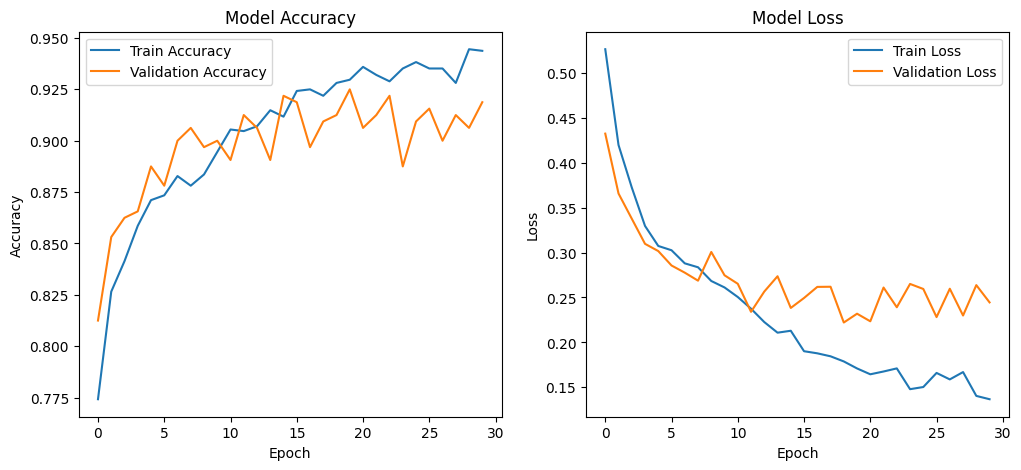

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()